# Step 18 1-Dense 층(1뉴런) AND-OR 분류
Sequential 모델로 생성한 2변수 입력, 출력에 sigmoid 활성화 함수를 사용하는 1뉴런의 1층 신경망이다.

신경망 모델의 파라미터는 가중치 2개(w0, w1), 1개 바이어스(b)를 갖는다.

여기서는 손실함수를 사용, RMSprop 최적화 방법 사용, 1뉴런 신경망 모델로 AND-OR 비트의 이진 분류를 구현한다.

XOR은 2층 신경망으로 분류한다. -> step 20

```python
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_dim = 2, activation = 'sigmoid'))
```
<br><br>
## step18_01
### 1-Dense 층(1뉴런) 신경망: AND, OR 비트 연산1 (loss='mse', cippingLineBox(line, box))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0049 - accuracy: 1.0000 - 225ms/epoch - 225ms/step
test_loss: 0.004865700379014015
test_acc: 1.0
1/1 [==============================] - 0s 99ms/step
y_pred: [[6.7107857e-04]
 [7.9488687e-02]
 [7.9484046e-02]
 [9.1737926e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]
4.86*x +4.86*y -7.31 = 0


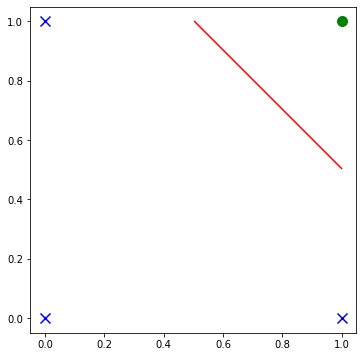

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1: data 만들기
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]], dtype=np.float32)
y_true = np.array([[0],[0],[0],[1]], dtype=np.float32) #AND
# y_true = np.array([[0],[1],[1],[1]], dtype=np.float32) #OR

#2: 층 쌓기
model = tf.keras.Sequential()
# activation = tf.keras.activations.sigmoid
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

#3: 환경설정(w, b 조정할 여러개)
# model.optimizer.lr: 0.001
##model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) 
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#훈련시키기(w, b 조정중...)
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0) #silent
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

y_pred = model.predict(X)
print("y_pred:", y_pred)

#true =1, false= 0으로 변경!
#0.5보다 크면 1, 작으면 0!!!
y_label = (y_pred> 0.5).astype(int) # Z = np.round(Z)
print("y_label:", y_label)

#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0, 1], marker='x', c="blue", s= 100)
plt.scatter(X[label==1, 0], X[label==1, 1], marker='o', c="green",s= 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx', markersize= 10)

def clippingLineBox(line, box):
    w0, w1, b = line
    xmin, xmax, ymin, ymax = box
    
    y0 =-(w0*xmin + b)/w1
    y1 =-(w0*xmax + b)/w1

    x0 = -(w1*ymin + b)/w0
    x1 = -(w1*ymax + b)/w0    

    xpoints = []
    ypoints = []
    if ymin <= y0 <= ymax:
        xpoints.append(xmin)
        ypoints.append(y0)
    if ymin <= y1 <= ymax:
        xpoints.append(xmax)
        ypoints.append(y1)
        
    if xmin <= x0 <= xmax:
        xpoints.append(x0)
        ypoints.append(ymin)
    if xmin <= x1 <= xmax:
        xpoints.append(x1)
        ypoints.append(ymax)
    return xpoints, ypoints
           
# clip the line against a box, and draw
xpoints, ypoints = clippingLineBox(line=(w0, w1, b), box=(0, 1, 0, 1))
plt.plot(xpoints, ypoints, color='red')
plt.show()

## step18_02
### 1-Dense 층(1뉴런) 신경망: AND, OR 비트 연산2 (loss='binary_crossentropy', plt.conture())
-> step18_01과 다른점: loss, 출력법

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0363 - accuracy: 1.0000 - 181ms/epoch - 181ms/step
test_loss: 0.03632718324661255
test_acc: 1.0
1/1 [==============================] - 0s 50ms/step
y_pred: [[1.2111452e-04]
 [4.3308351e-02]
 [4.7758788e-02]
 [9.4935113e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]
6.03*x +5.92*y -9.02 = 0
326/326 [==============================] - 1s 2ms/step


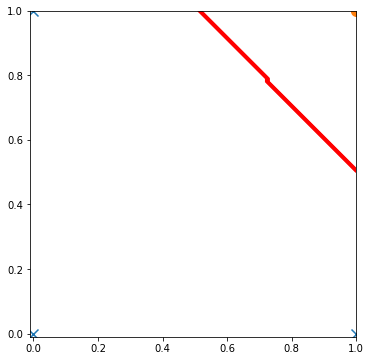

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)    # AND
##y_true = np.array([[0],[1], [1],[1]], dtype = np.float32)  # OR

#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=1))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.summary()

#3
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = (y_pred> 0.5).astype(int)
print("y_label:", y_label)

#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample) 
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


# Step 19 1-Dense 층(2뉴런) AND-OR 분류
p.145!!


[그림19.1] 2D 입력의 1-Dense 층(2뉴런)의 softmax 활성화 함수를 사용하는 신경망이다.

신경망 모델의 파라미터는 가중치 4개(w00, w01, w10, w11)와 바이어스 2개(b0, b1)이다.

교차 엔트로피 오차 손실함수 'categorical_crossentropy', 'sparese_categorical_crossentropy'를 사용하여 AND, OR 비트연산의 이진분류를 수현한다.

```python
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
```
<br><br>
## step19_01
### 1-Dense 층(2뉴런) 신경망: AND, OR 비트 연산 1(loss='sparse_categorical_corssentropy')
! fit: 훈련

! predict: 예측 확률 반환(테스트의 분류 결과 예측)

! evaluate: 정확도 등의 Metric 반환(테스트를 입력해서 성능 평가)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
weights: [[-4.471084   4.5625696]
 [-5.1672735  3.962621 ]]
bias: [ 6.8549013 -6.854901 ]
1/1 - 0s - loss: 0.0078 - accuracy: 1.0000 - 195ms/epoch - 195ms/step
1/1 [==============================] - 0s 59ms/step
y_pred: [[9.9999893e-01 1.1114961e-06]
 [9.8984832e-01 1.0151732e-02]
 [9.9077117e-01 9.2288572e-03]
 [1.1501094e-02 9.8849887e-01]]
y_label: [0 0 0 1]
326/326 [==============================] - 0s 1ms/step


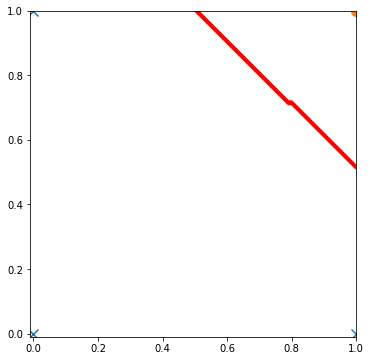

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)

##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


## step19_02
### 1-Dense 층(2뉴런) 신경망: AND, OR 비트 연산 2(loss='categorical_corssentropy')

y_true= [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
weights: [[-4.565486   3.9729536]
 [-3.9967084  4.543537 ]]
bias: [ 6.433527  -6.4335275]
1/1 - 0s - loss: 0.0102 - accuracy: 1.0000 - 174ms/epoch - 174ms/step
1/1 [==============================] - 0s 83ms/step
y_pred: [[9.9999738e-01 2.5817151e-06]
 [9.8696262e-01 1.3037414e-02]
 [9.8698586e-01 1.3014193e-02]
 [1.4605682e-02 9.8539436e-01]]
y_label: [0 0 0 1]
326/326 [==============================] - 0s 1ms/step


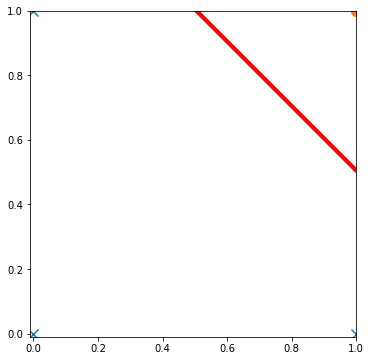

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR
y_true = tf.keras.utils.to_categorical(y_true) 
print("y_true=", y_true)

#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

#4 calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = np.argmax(y_true, axis = 1)
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)

##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

# Step 20 2층 신경망 : XOR 이진 분류
p.151!!

XOR 비트 연산은 하나의 직선으로 경계를 분리할 수 없어서 2-Dense 층을 이용하여 XOR 비트 연산을 구현한다.

다층 신경망은 입력데이터를 받는 입력층, 분류를 담당하는 출력층, 중간층은 은닉층이라 한다.
<br><br><br><br>
### 1. 뉴런 1개의 출력층 이진 분류
신경망의 출력층의 뉴런이 1개일 때 손실함수는 'mse', 'binary_crossentropy'를 사용하고, 출력층의 활성화 함수를 'sigmoid'를 사용하면 예측값이 0.5보다 작으면 0으로 분류, 0.5보다 크면 1로 분류한다.

[그림20.1] 참고!

은닉층에 n 뉴런, 출력층에 1 뉴런을 갖는 신경망이고, 0-layers는 (2*n)개 가중치와 n개 바이어스가 있다. 1-layer는 n개 가중치와 1개 바이어스가 있다.


```python
model = tf.keras.Sequential()
n = 2
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()
```

## step20_01
### 2층 신경망: XOR 비트 연산1: (출력층 뉴런 1개: loss = 'mse', 'binary_crossentropy')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 3.2997e-10 - accuracy: 1.0000 - 104ms/epoch - 104ms/step
326/326 [==============================] - 0s 1ms/step


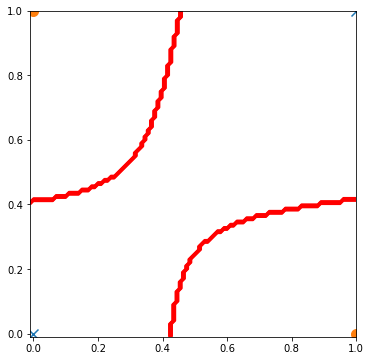

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR

#2
n = 10  # 2,  number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=n))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=1))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.summary()


opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=2000, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 2
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
##y_pred = model.predict(X)
##print("y_pred:", y_pred)
##
##y_label = (y_pred> 0.5).astype(int)
##print("y_label:", y_label)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


### 2. 뉴런 2개의 출력층 이진 분류
신경망의 출력층의 뉴런이 2개일 때 손실함수는 'categorical_crossentropy', 'sparese_categorical_crossentropy'를 사용하고, 출력층의 활성화 함수를 'softmax'를 사용한다.

2개의 뉴런에 출력 레이블을 부여하고, np.argmax()로 예측값이 큰 뉴런의 레이블로 분류한다.

[그림20.3] 참고!

은닉층에 n 뉴런, 출력층에 2 뉴런을 갖는 신경망이고, 0-layers는 (2*n)개 가중치와 n개 바이어스가 있다. 1-layer는 (2*n)개 가중치와 2개 바이어스가 있다.


```python
model = tf.keras.Sequential()
n = 2
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
```

## step20_02
### 2층 신경망: XOR 비트 연산2: (출력층 뉴런 2개: loss = 'mse', 'binary_crossentropy')

y_true= [[0.]
 [1.]
 [1.]
 [0.]]
y_true= [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 207ms/epoch - 207ms/step
326/326 [==============================] - 1s 1ms/step


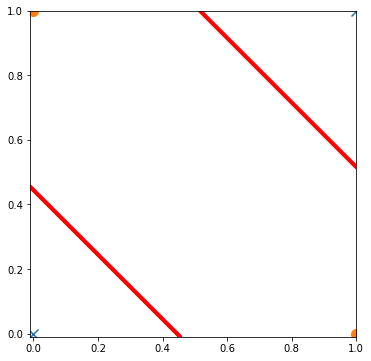

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

# loss='sparse_categorical_crossentropy'
##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR
print("y_true=", y_true)
y_true = tf.keras.utils.to_categorical(y_true) # loss='categorical_crossentropy'
print("y_true=", y_true)

#2
model = tf.keras.Sequential()
n = 2  # number of neurons in a hidden layer
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=1000, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 2
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
##y_pred = model.predict(X)
##print("y_pred:", y_pred)
##
##y_label = np.argmax(y_pred, axis = 1)
##print("y_label:", y_label)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

##label = y_true.flatten()            # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='categorical_crossentropy'
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()
